### Process the Review Data 
a. process the review data of IMDb, Rotten Tomatoes and Inidivudal Film 
    1. combine into Pandas Dataframe
    2. clean the text comment 
b. statsitc summary the review text data

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import json
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [43]:
## load the json data for processing
# Total Review
with open('review_data.json', 'r') as fp:
    review_dict = json.load(fp)  
    

* Individual Review

In [ ]:
# Individual Review
with open('beast_review.json', 'r') as fp:
    beast_review = json.load(fp)

df_beast = generate_review_df(beast_review)

* Critics Review 

In [65]:
# Critical Review
with open('critic_review.json', 'r') as fp:
    critic_review = json.load(fp)

In [87]:
mov_ls = []

for mov, val in tqdm(critic_review.items()):
    df_mov = pd.DataFrame(val).T
    # add up movie value
    df_mov['movie'] = mov
    df_mov.dropna(how = 'any', inplace = True)
    mov_ls.append(df_mov)
    
## generate the critic review df 
df_review = pd.concat(mov_ls, axis = 0)

df_review = df_review[df_review['score'] != '']

100%|██████████| 1967/1967 [00:10<00:00, 196.15it/s]


In [44]:
# movie list
movie_ls = review_dict.keys()

In [45]:
def generate_review_df(movie_dict):
    # generate the df
    df_review = pd.DataFrame(movie_dict).T
    df_review_mid = df_review.reset_index()
    # eliminate the empty content
    df_review_mid = df_review_mid[df_review_mid['content'] != '']
    # transfer into integer rating
    df_review_mid['rating'] = df_review_mid['rating'].apply(lambda x : int(x.split('/')[0]))

    return df_review_mid

In [46]:
mov_list = []

for mov in tqdm(movie_ls):
    # access the movie corresponding dic
    ind_movie_dic = review_dict[mov]
    
    if len(ind_movie_dic) == 0:
        print('{} movie is missing value'.format(mov))
        continue
    # derive the data frame
    ind_df = generate_review_df(ind_movie_dic)
    ind_df['movie'] = mov
    # append the individual df
    mov_list.append(ind_df)
    
df_review = pd.concat(mov_list)

del mov_list 

100%|██████████| 2664/2664 [02:20<00:00, 18.97it/s]


in total 99994 comments

In [47]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99994 entries, 0 to 23
Data columns (total 5 columns):
index      99994 non-null object
content    99994 non-null object
date       99994 non-null object
rating     99994 non-null object
movie      99994 non-null object
dtypes: object(5)
memory usage: 4.6+ MB


* check the review comment

In [100]:
def sample_comment(df_review, num = 10):
    return df_review['content'].sample(num).values

In [105]:
sample_comment(df_review)

array([' After eight years and six instalments Paranormal Activity has indeed finally run its course. Be [thankful] that the series goes out with a bang rather than a whimper.',
       ' The kind of movie that exists solely to facilitate a great performance in the lead role, and Julianne Moore provides one.',
       ' It is a righteous, religious film that almost bludgeons audiences with its powerful message, and is the product of the one-man-band of Nate Parker, who wrote, directed and plays the lead.',
       ' Fans of the source material may still be eager for the next chapter but for casual viewers this is a disappointingly bland sequel.',
       ' What matters here is the dancing, an unexpectedly bold blend of pure sexuality and giddy aesthetics',
       ' The movie approximates the boredom of life as a Tom Cruise stunt double.',
       " A loud, frenetic kid pleaser, though parents' brains may short-circuit.",
       " Charles M. Schulz would have loved this one. It's a terrific 

### Data Cleaning

In [49]:
import re

In [118]:
def review_clean(content):
    signal = 'Was this review helpful? Sign in to vote.\nPermalink'
    if signal in content:
        content = ''.join(content.split('\n')[:-2])
    
    # Remove any extra spaces
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", content)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " : ", text)
    # remove the white space
    text = re.sub(r"   ", " ", text) 
    text = re.sub(r"  ", " ", text)
    
    return text

In [119]:
# eliminate last two sentence
df_review['content'] = df_review['content'].apply(review_clean)

#### Statistical Summary

In [120]:
df_review['word_length'] = df_review['content'].apply(lambda x: len(x.split()))

In [121]:
np.percentile(df_review['word_length'], 70)

29.0

(1824, 209.11729703782228, 180.76305393838092)

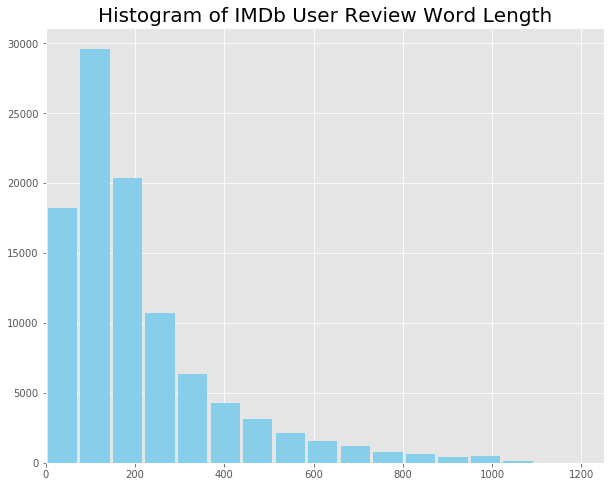

In [6]:
df_review['word_length'].hist(figsize = (10,8),
                              bins = 25,
                              color = 'skyblue',
                              rwidth = 0.9)
plt.title("Histogram of IMDb User Review Word Length", fontsize = 20)
plt.xlim(0, 1250)
np.max(df_review['word_length']), np.mean(df_review['word_length']), np.std(df_review['word_length'])

In [125]:
# transfer into datetime
df_review['date'] = df_review['date'].apply(pd.to_datetime)

In [126]:
#df_review.to_csv('general_review.csv')
df_review.to_csv('critics_review.csv')

Review Training Dataset

In [9]:
df_review['score'] = df_review['score'].astype(float)
df_review = df_review[~((df_review['score'] > 10) | (df_review['score'] < 0))]

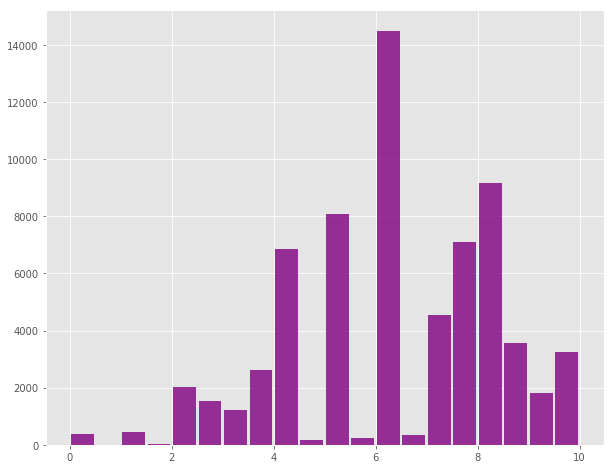

In [13]:
df_review['score'].hist(bins = 20,
                        figsize = (10,8),
                        rwidth = 0.9,
                        color = 'purple', alpha =0.8 )

* map into outcome

In [29]:
def score_to_sentiment(num):
    if num <= 5:
        # negative
        return 0
    elif num <= 7:
        # neutralize
        return 1
    else:
        # positive
        return 2

In [30]:
# generate predicted value
df_data = df_review[['content']].copy()

df_data['sentiment'] = df_review['score'].apply(score_to_sentiment)

In [31]:
df_sent_dist = df_data.groupby('sentiment').count()

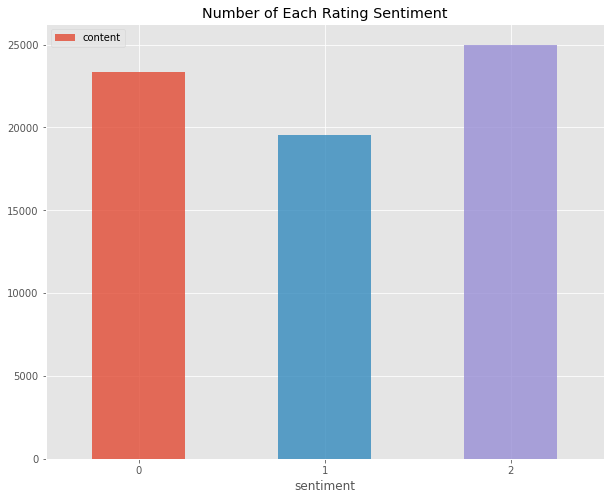

In [32]:
df_sent_dist.plot.bar(y = 'content',
                      rot = 0,
                      title = 'Number of Each Rating Sentiment',
                      figsize = (10,8), alpha = 0.8)